# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.0,0.833
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839
4,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.147060,0.06525,0.033500,0.901250
std,0.431956,0.05873,0.068998,0.068401
min,-0.886000,0.00000,0.000000,0.729000
25%,0.000000,0.00000,0.000000,0.857500
50%,0.138950,0.06650,0.000000,0.905500
75%,0.443775,0.09650,0.043000,0.924750
max,0.690800,0.16100,0.271000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.220145,0.06820,0.010800,0.920950
std,0.333940,0.06409,0.027714,0.061859
min,-0.440400,0.00000,0.000000,0.810000
25%,0.000000,0.00000,0.000000,0.863250
50%,0.226300,0.06200,0.000000,0.922500
75%,0.445000,0.10750,0.000000,0.967750
max,0.735100,0.19000,0.094000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9]")
    re_clean = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Remove stop words and convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]

    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, u, buy, hold, s..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedle, getty, images, twitter, s..."
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-31,As the broader crypto world enjoys a late summ...,0.7351,0.167,0.0,0.833,"[broader, crypto, world, enjoys, late, summer,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.0,0.810,"[cent, wa, founded, 2017, ad, free, creator, n..."
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,"[paypal, allow, user, outside, u, buy, hold, s..."
3,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."
4,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.0,0.861,"[bell, today, coinbase, reported, another, per..."


---
### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin.

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bitcoin_counter = tokenizer(bitcoin_df['text'].str.cat())
bitcoin_counts = Counter(ngrams(bitcoin_counter, n=2))
print(dict(bitcoin_counts))

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1, ('cob', '3499'): 1, ('3499', 'char'): 1, ('char', 'paypal'): 4, ('paypal', 'allow'): 2, ('allow', 'user'): 2, ('user', 'outside'): 1, ('outside', 'u'): 1, ('u', 'buy'): 1, ('buy', 'hold'): 3, ('hold', 'sell'): 3, ('sell', 'cryptocurrency'): 1, ('cryptocurrency', 'first'): 1, ('first', 'time'): 2, ('time', 'company'): 1, ('company', 'announced'): 1, ('announced', 'today'): 1, ('today', 'launch'): 1, ('launch', 'new'): 1, ('new', 'service'): 1, ('service', 'allow'): 1, ('allow', 'customer'): 2, ('customer', 'u'): 1, ('u', 'k'): 1, ('k', '4420'): 1, ('4420', 'char'): 1, ('char

In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_counter = tokenizer(ethereum_df['text'].str.cat())
ethereum_counts = Counter(ngrams(ethereum_counter, n=2))
print(dict(ethereum_counts))

{('broader', 'crypto'): 1, ('crypto', 'world'): 1, ('world', 'enjoys'): 1, ('enjoys', 'late'): 1, ('late', 'summer'): 1, ('summer', 'surge'): 1, ('surge', 'enthusiasm'): 1, ('enthusiasm', 'blockchain'): 1, ('blockchain', 'developer'): 1, ('developer', 'taken'): 1, ('taken', 'plunge'): 1, ('plunge', 'bumping'): 1, ('bumping', 'blaring'): 1, ('blaring', 'scaling'): 1, ('scaling', 'issue'): 1, ('issue', 'faced'): 1, ('faced', 'decentralized'): 1, ('decentralized', '3414'): 1, ('3414', 'char'): 1, ('char', 'cent'): 1, ('cent', 'wa'): 1, ('wa', 'founded'): 1, ('founded', '2017'): 1, ('2017', 'ad'): 1, ('ad', 'free'): 1, ('free', 'creator'): 1, ('creator', 'network'): 1, ('network', 'allows'): 1, ('allows', 'user'): 1, ('user', 'offer'): 1, ('offer', 'crypto'): 1, ('crypto', 'reward'): 1, ('reward', 'good'): 1, ('good', 'post'): 1, ('post', 'comment'): 1, ('comment', 'like'): 1, ('like', 'gifting'): 1, ('gifting', 'award'): 1, ('award', 'reddit'): 1, ('reddit', 'ethereum'): 1, ('ethereum', '

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_counter, N=10)

[('char', 20),
 ('bitcoin', 11),
 ('cryptocurrency', 9),
 ('first', 8),
 ('reuters', 6),
 ('paypal', 5),
 ('customer', 5),
 ('twitter', 5),
 ('allow', 4),
 ('mobile', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_counter, N=10)

[('char', 20),
 ('ethereum', 13),
 ('reuters', 8),
 ('bitcoin', 7),
 ('ha', 6),
 ('crypto', 5),
 ('ether', 5),
 ('network', 4),
 ('paypal', 4),
 ('cryptocurrency', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

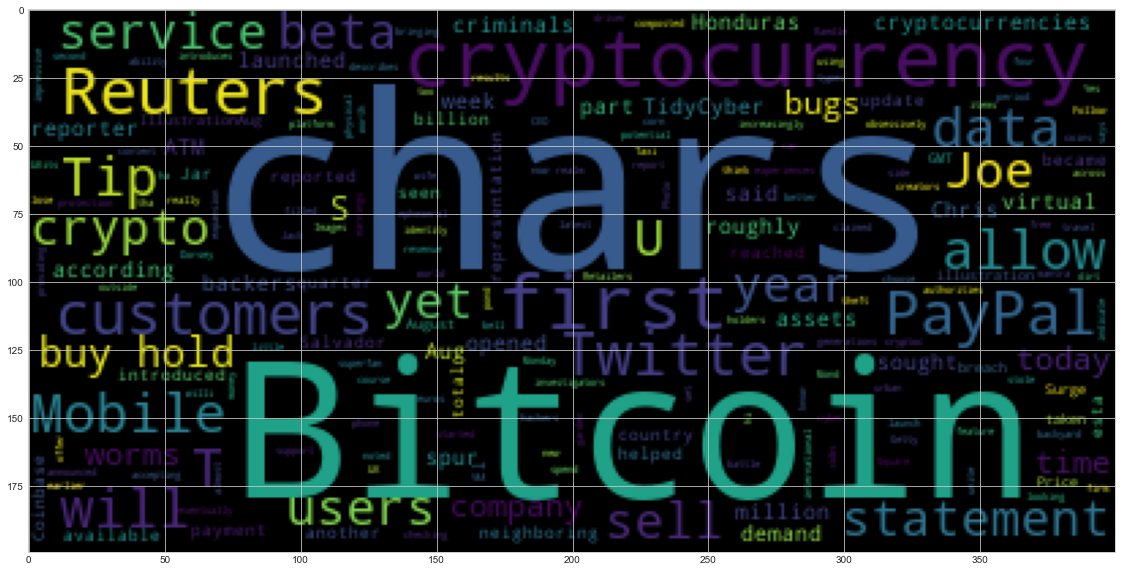

In [22]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(bitcoin_df.text.str.cat())
plt.imshow(bitcoin_wc);

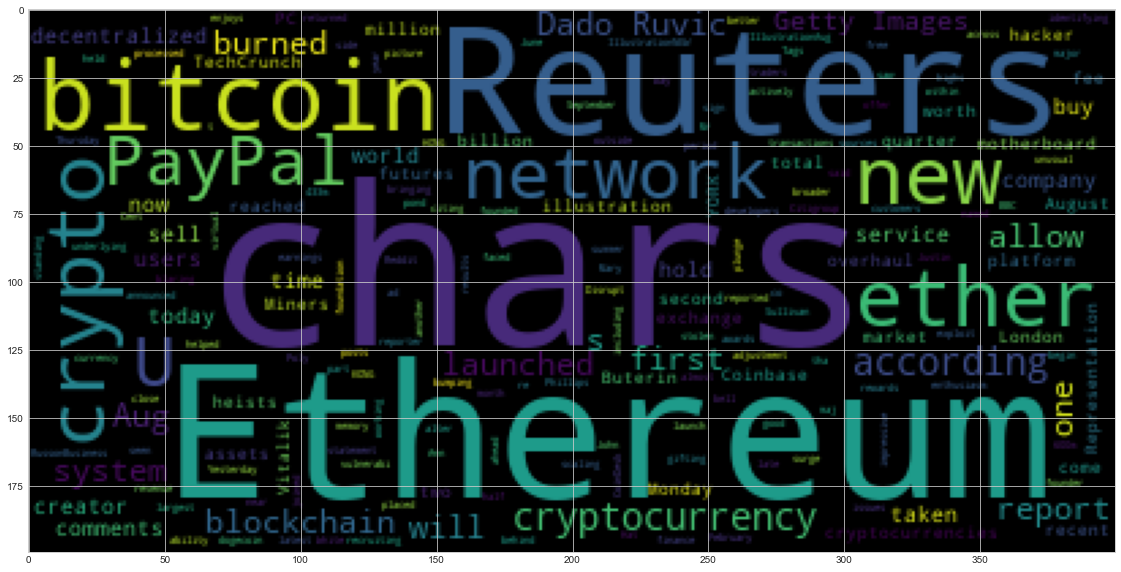

In [23]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(ethereum_df.text.str.cat())
plt.imshow(ethereum_wc);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_concat = bitcoin_df['text'].str.cat()

In [28]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_concat)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ in ['GPE', 'LOC', 'MONEY', 'NORP', 'ORG', 'PERSON']])

['U.S.', 'U.K.', 'Joe Raedle/', 'Jack Dorsey', 'US', 'Joe TidyCyber', 'Chris', '2,100', 'Chris', 'Joe', 'Reuters', 'ATM', 'Honduras', 'El Salvador', 'UK', 'Reuters', 'ATM', 'Honduras', 'El Salvador', 'Coinbase', 'Coinbase', '$2.23 billion', 'Twitter', '$311 billion', 'Insider Intellige', 'REUTERS', 'Dado Ruvic/IllustrationAug', 'Reuters', '49,106.4', '+416 chars]T-Mobile', 'Motherboard', 'PennyStocksBitcoin Price Surge Helped Boost', 'Bitcoin, Dogecoin', 'Ethereum', 'T-Mobile', 'Twitter', 'Twitter al', 'REUTERS', 'Edgar Su/IllustrationAug', 'Reuters', '47,587.38']


---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_concat = ethereum_df['text'].str.cat()

In [32]:
# Run the NER processor on all of the text
doc = nlp(ethereum_concat)

# Add a title to the document
doc.user_data['title'] = 'Ethereum NER'

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ in ['GPE', 'LOC', 'MONEY', 'NORP', 'ORG', 'PERSON']])

['Reddit', 'Ethereum', 'U.S.', 'U.K.', 'US', 'Coinbase', 'Coinbase', '$2.23 billion', 'Ethereum', 'REUTERS', 'Dado Ruvic', 'Reuters', 'Poly Network', 'White', '+1513 chars]HONG KONG', 'Reuters', 'Ethereum', 'REUTERS', 'Dado Ruvic/IllustrationAug 3', 'Reuters', 'Ethereum', 'TechCrunch Disrupt London 2015', 'John Phillips', 'Vitalik Buterin', 'Sullivan/Getty Images\r\nCitigroup', 'BBC News', '$600m', '433', 'Reuters', 'above $100', '$311 billion', 'Insider Intellige', 'chars]More than $144 million', 'Dado Ruvic', 'Reuters', 'More than $144 million', 'Ethereum', 'Taylor', 'VanEck', 'Ethereum', 'the US Securities and Exchange Commission', 'Chuck Mikolajczak', 'NEW YORK', 'Reuters']


---